<h1 style="text-align:center;">Everything Plus's U.K. Customer Profiles Using RFM Analysis</h1>

## <a href="https://public.tableau.com/profile/daniel.garcia.rodriguez#!/vizhome/graduationProject/RFMDashboard">Link</a> to dashboard solution.

### By: Daniel Garcia
### Date Completed: 10/2/2020

<div>
<table style="align:left;font-family: sans-serif; border-collapse: collapse;border: 1px solid #ddd;width:40%">
  <tr style="background-color: #f2f2f2;">
    <th style="padding-top: 20px;
  padding-bottom: 15px;padding-left:20px;font-size:25px;
  text-align: center;background-color: #4CAF50;
  color: white;">Table of Contents</th></tr>
    <tr><td style="text-align:left;font-size:16px;padding-top: 10px;padding-bottom: 5px;"><a href="#1">1. Introduction</a></td></tr>
    <tr><td style="text-align:left;font-size:16px;padding-top: 10px;padding-bottom: 5px;"><a href="#2">2. General Overview of Data</a></td></tr>
    <tr><td style="text-align:left;font-size:16px;padding-top: 10px;padding-bottom: 5px;"><a href="#3">3. Data Preprocessing</a></td></tr>
    <tr><td style="text-align:left;font-size:16px;padding-top: 10px;padding-bottom: 5px;"><a href="#4">4. Exploratory Data Analysis</a></td></tr>
    <tr><td style="text-align:left;font-size:16px;padding-top: 10px;padding-bottom: 5px;"><a href="#5">5. Product Clustering (exploratory)</a></td></tr>
    <tr><td style="text-align:left;font-size:16px;padding-top: 10px;padding-bottom: 5px;"><a href="#6">6. RFM Segmentation</a></td></tr>
    <tr><td style="text-align:left;font-size:16px;padding-top: 10px;padding-bottom: 5px;"><a href="#7">7. Conclusion</a></td></tr>
 </table>
</div>

<a id='1'></a>

# 1. Introduction

## 1.1 Business Goal
Identify and form segments of customers based on similar purchasing characteristics (from transactional data) to inform the sales and marketing strategy of the company. Hypothetically speaking, the company is interested in profiles for customers located in the U.K. where the majority of their customers are located in. In terms of currency, the company hypothetically requested that it be in U.S. dollar rather than in pounds. Lastly, the company also requested that the analysis to be based on one year (here defined as year from the last day of transaction recorded in the dataset).

## 1.2 Method Overview

Segment users based on their consumer profiles using RFM and produced dashboard for hypothetical client (online store marketing and sales team). My mains steps:
1. Got a general idea of the underlying data through basic exploration steps
2. Dealt with missing values, erroneous or faulty data (ie. negative values), dropped duplicates, and changed data types.
3. Carried out exploratory data analysis. Explored the distribution of variables (ie. `quantity`) over time (date, month) and per unique customer.
4. Preprocessed and conducted an exploratory clustering analysis of the products; used Facebook's fastText unsupervised algorithm to create vectors from product name and then applied K-means on the result (no statistical tests were done to test K-means clustering performance.
5. Used RFM model to segment customers. 
6. Exported relevant data from analysis and created a Tableau dashboard as a deliverable for hypothetical stakeholder.


## 1.3 Description of the data

The dataset contains the transaction history of Everything Plus, an online store that sells household goods.

The file `ecommerce_dataset_us.csv` contains the following columns:

`InvoiceNo` — Invoice number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

`StockCode` — item identifier

`Description` — item name

`Quantity`

`InvoiceDate` — order date

`UnitPrice` — price per item

`CustomerID`

# 1.4 Solution

**Note:** Design may not be as responsive. Needs some adjustments but for now here's my final draft dashboard solution.

In [9]:
%%html
<div class='tableauPlaceholder' id='viz1602221158022' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;gr&#47;graduationProject&#47;RFMDashboard&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='graduationProject&#47;RFMDashboard' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;gr&#47;graduationProject&#47;RFMDashboard&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1602221158022');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='1727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

## 1.5 Packages Used

In [2]:
# Main libraries used - data wrangling and plotting
import pandas as pd; import numpy as np
import seaborn as sns; import matplotlib.pyplot as plt; import matplotlib
from commonFunctions import missing_values, modifyChartBasic , modifyChartExtra, count_values
from IPython.display import display

# Stats
from sklearn.cluster import KMeans
import scipy.stats as st
from math import log, floor, sqrt, log10

#Dates
import itertools
from dateutil.relativedelta import relativedelta
import datetime as dt

# Word cloud and treemap
import squarify
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import io

#Word Preprocessing
#import fasttext
import re
import nltk; from nltk.stem import WordNetLemmatizer;from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize; from nltk.tag import pos_tag #noun extraction
nltk.download('averaged_perceptron_tagger'); nltk.download('punkt')
nltk.download('wordnet'); nltk.download('stopwords')

C:\Users\garci\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\garci\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\garci\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\garci\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\garci\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<a id='2'></a>

# 2. General Overview of Data

Reading in main dataset and only customer ID and country columns:  main aim is to keep only customers located in U.K.

In [3]:
filepath = 'https://raw.githubusercontent.com/dannygarcia193/datasets/master/ecommerce_dataset_us.csv'
filepath2 = 'https://raw.githubusercontent.com/dannygarcia193/datasets/master/data.csv'
df = pd.read_csv(filepath, sep='delimiter', delimiter='\t',
                 parse_dates=['InvoiceDate'])  # main data
kaggle = pd.read_csv(filepath2, encoding='unicode_escape', usecols=[
                     'CustomerID', 'Country'])  # to keep U.K. customers

Ensuring that the number of unique customers are the same and that both datasets share the same unique customer IDs.

In [4]:
print(
    f"Kaggle unique users: {kaggle['CustomerID'].nunique()} | Main data unique users {df['CustomerID'].nunique()}")

# do both datasets share the same unique customer IDs
set(df['CustomerID'].fillna(0).unique() ==
    kaggle['CustomerID'].fillna(0).unique())

Kaggle unique users: 4372 | Main data unique users 4372


{True}

Everything is good here. Before merging, let's check the countries' relative share in the dataframe.

Text(0.5, 0, 'Percent (%)')

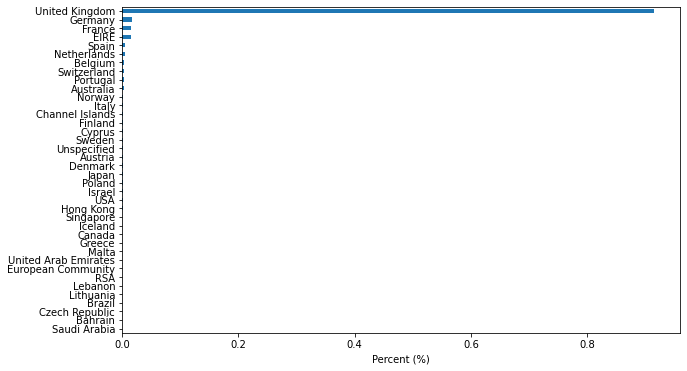

In [5]:
kaggle['Country'].value_counts(
    normalize=True).sort_values().plot.barh(figsize=(10, 6))
plt.xlabel("Percent (%)")

Roughly 90% of more of customers come from the U.K. Let's filter out all the countries except U.K.

In [6]:
customersFromUK = kaggle.query("Country=='United Kingdom'")[
    'CustomerID'].unique()
df = df.query("CustomerID in @customersFromUK").reset_index(
    drop=True)  # customers from U.K. only

# rename columns for convenience
df.columns = ['orderID', 'itemID', 'description',
              'quantity', 'orderDate', 'unitPrice', 'customerID']
df.head()

,orderID,itemID,description,quantity,orderDate,unitPrice,customerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0


Another filtering we'll need to do is to ensure that the dates are within one year from each other (will be used for RFM model). 

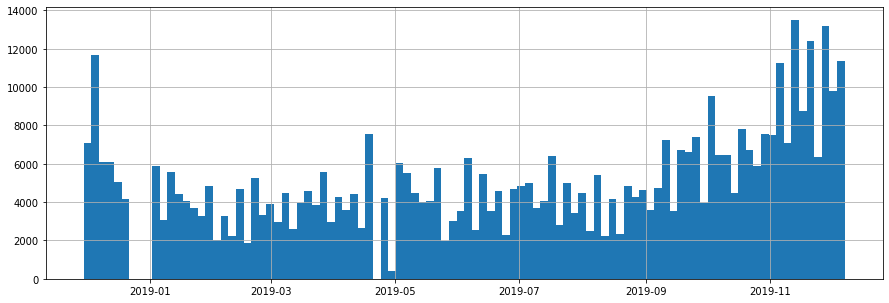

In [7]:
df['orderDate'].hist(figsize=(15,5),bins=100)

Here we can see gap between the Jan. 2019 as well as Nov to Dec.2018. For this case, we'll be filtering the dataset by subtracting one year from the maximum date available. 

In [8]:
oneYearThreshold = df['orderDate'].max() -  relativedelta(years=1)
print(df['orderDate'].agg([min, max]))

min   2018-11-29 08:26:00
max   2019-12-07 12:49:00
Name: orderDate, dtype: datetime64[ns]


So in the end, we'll be droppping roughly 8-10 dates from the data. 

In [9]:
df= df[df['orderDate'] >= oneYearThreshold].reset_index(drop=True)
df.head()

,orderID,itemID,description,quantity,orderDate,unitPrice,customerID
0,538014,22969,HOMEMADE JAM SCENTED CANDLES,12,2018-12-07 12:49:00,1.45,14440.0
1,538014,72802B,OCEAN SCENT CANDLE IN JEWELLED BOX,12,2018-12-07 12:49:00,4.25,14440.0
2,538014,85066,CREAM SWEETHEART MINI CHEST,12,2018-12-07 12:49:00,12.75,14440.0
3,538014,82483,WOOD 2 DRAWER CABINET WHITE FINISH,6,2018-12-07 12:49:00,5.95,14440.0
4,538014,82486,WOOD S/3 CABINET ANT WHITE FINISH,6,2018-12-07 12:49:00,7.95,14440.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477839 entries, 0 to 477838
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   orderID      477839 non-null  object        
 1   itemID       477839 non-null  object        
 2   description  476457 non-null  object        
 3   quantity     477839 non-null  int64         
 4   orderDate    477839 non-null  datetime64[ns]
 5   unitPrice    477839 non-null  float64       
 6   customerID   349413 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 25.5+ MB


Some missing values in the description and customer ID columns.
OrderID and itemID as objects which should be numerical. We'll keep this in mind.

In [11]:
df.describe()

,quantity,unitPrice,customerID
count,477839.00000,477839.000000,349413.000000
mean,8.66135,4.435794,15539.360940
std,231.22014,92.744878,1591.376289
min,-80995.00000,-11062.060000,12346.000000
25%,1.00000,1.250000,14189.000000
50%,3.00000,2.080000,15505.000000
75%,10.00000,4.130000,16923.000000
max,80995.00000,38970.000000,18287.000000


When looking at the statistical description of the dataframe we can observe some anomalies in the data for the quantity an unit price columns.

Checking for quantity column.

In [12]:
qmin, qmax = df['quantity'].agg([min, max])

df.query('quantity in [@qmin, @qmax]')

,orderID,itemID,description,quantity,orderDate,unitPrice,customerID
476466,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2019-12-07 09:15:00,2.08,16446.0
476467,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2019-12-07 09:27:00,2.08,16446.0


Interestingly enough, we can observe that there are negative values recorded in the dataset with the columns having outliers are indicated by the quantity and unit price's maximum value and 75% quantile. It seems likely that the negative values are from canceled orders. Before looking, let's check for any other instances of erroneous data (ie. duplicates).

Checking for duplicated data.

In [13]:
df[df.duplicated()]

,orderID,itemID,description,quantity,orderDate,unitPrice,customerID
114,538035,20728,LUNCH BAG CARS BLUE,3,2018-12-07 13:03:00,1.65,16065.0
212,538051,22659,LUNCH BOX I LOVE LONDON,2,2018-12-07 13:24:00,1.95,18041.0
1948,538155,21907,I'M ON HOLIDAY METAL SIGN,1,2018-12-07 16:52:00,2.10,16907.0
2071,538166,21915,RED HARMONICA IN BOX,5,2018-12-07 18:09:00,1.25,17965.0
2118,538168,22739,RIBBON REEL CHRISTMAS SOCK BAUBLE,5,2018-12-07 19:23:00,1.65,14702.0
...,...,...,...,...,...,...,...
477684,581538,22068,BLACK PIRATE TREASURE CHEST,1,2019-12-07 11:34:00,0.39,14446.0
477698,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2019-12-07 11:34:00,2.49,14446.0
477701,581538,22992,REVOLVER WOODEN RULER,1,2019-12-07 11:34:00,1.95,14446.0
477708,581538,22694,WICKER STAR,1,2019-12-07 11:34:00,2.10,14446.0


Around 4.8k of rows in the dataset were identified as having a duplicate. We'll drop these values to avoid distorting the results.

In [14]:
df.duplicated().sum() /len(df)*100

1.0206366579538295

1% of rows identified as duplicates will be dropped.

In [15]:
df = df.drop_duplicates().reset_index(drop=True)

Checking for missing values

In [16]:
missing_values(df)

orderID
itemID
description


C:\Users\garci\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


quantity
orderDate
unitPrice
customerID


[('customerID', 'Null values in customerID: 27.14'),
 ('quantity', 'Negative values in quantity: 1.89'),
 ('description', 'Null values in description: 0.29'),
 ('unitPrice', 'Negative values in unitPrice: 0.0')]

Description and customer ID contain the same amount of missing values. Maybe this may have been from the canceled transactions?
Here we can see that quantity purchased has a small % of it's values as negative with very few of unit price being in the negative range. My best bet is that quantity is from canceled items while unit price negative value may have come from a discount or possibly technical issue.

<a id='3'></a>

# 3. Preprocessing

For this dataset, here's the approach for dealing with missing values: 
1. Drop customer ids where null 
1. Explore quantity and customer ID and see if we can find any pattern.
3. Drop unit price; given it's very low % of missing values we can safely drop

In [17]:
customerNulls = df.fillna('Null here').query("customerID == 'Null here'")
print(missing_values(customerNulls))

orderID
itemID
description
quantity
orderDate
unitPrice
customerID
[('quantity', 'Negative values in quantity: 1.27'), ('unitPrice', 'Negative values in unitPrice: 0.0')]


Here we can see that (1) description and customer nulls are in the same row since no description nulls were printed out and (2) most negative quantity values are in the null customer ID rows but not all of them to conclude that -> null customer ID == customers who canceled orders. Let's drop the null values given their large % of missing values.  


In [18]:
df =df.dropna().reset_index(drop=True)
df.head()

,orderID,itemID,description,quantity,orderDate,unitPrice,customerID
0,538014,22969,HOMEMADE JAM SCENTED CANDLES,12,2018-12-07 12:49:00,1.45,14440.0
1,538014,72802B,OCEAN SCENT CANDLE IN JEWELLED BOX,12,2018-12-07 12:49:00,4.25,14440.0
2,538014,85066,CREAM SWEETHEART MINI CHEST,12,2018-12-07 12:49:00,12.75,14440.0
3,538014,82483,WOOD 2 DRAWER CABINET WHITE FINISH,6,2018-12-07 12:49:00,5.95,14440.0
4,538014,82486,WOOD S/3 CABINET ANT WHITE FINISH,6,2018-12-07 12:49:00,7.95,14440.0


Let's do a check and see if negative values in quantity match a positive quantity. If so, we may need to make some adjustments to the data to take that into account.
-unit price not much of a deal and we'll drop.

In [19]:
df = df.query("unitPrice >0")

Investigating negative quantity values (defined as canceled).

In [20]:
canceledOrders = df.query("quantity <0")

Checking for unique letters in the order column. Are negative quantity values all canceled (**labeled as c**) orders?

In [21]:
canceledOrders['orderID'].apply(lambda x: x[0]).value_counts()

C    7294
Name: orderID, dtype: int64

So as hypothesized,considering that the column contains all negative quantity values, 'C' is a reference to canceled orders. We'll first try to test whether we can drop both the the negative an positive canceled quantity as it'll make our data more reliable. 

The approach:
1. Create a variable containing positive quantity values and reset index as it'll be used to filter out canceled quantity match (+ and -)
2. Reset index for canceled orders as well. Get the absolute value of quantity as it'll be one of the columns used to merge the dataframes on.
3. Save columns that will be used to merge dataframes (canceled and non-canceled orders DFs) on. Use inner join to merge the dataframes.

In [22]:
notNegative = df[df['quantity']>0].reset_index()
canceledOrders  = canceledOrders.reset_index()
canceledOrders['quantity'] = abs(canceledOrders['quantity'])
columnsToCheck = ['customerID','unitPrice','quantity','description']

In [23]:
match= pd.merge(notNegative, canceledOrders, on =columnsToCheck).sort_values("customerID")
match

,index_x,orderID_x,itemID_x,description,quantity,orderDate_x,unitPrice,customerID,index_y,orderID_y,itemID_y,orderDate_y
605,21500,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2019-01-16 10:01:00,1.04,12346.0,21505,C541433,23166,2019-01-16 10:17:00
1497,131581,556910,22991,GIRAFFE WOODEN RULER,6,2019-06-13 13:25:00,1.95,12748.0,61208,C546997,22991,2019-03-16 13:32:00
1486,61085,546991,22403,MAGNETS PACK OF 4 VINTAGE LABELS,6,2019-03-16 13:08:00,1.25,12748.0,61217,C546997,22403,2019-03-16 13:32:00
1484,61084,546991,22923,FRIDGE MAGNETS LES ENFANTS ASSORTED,6,2019-03-16 13:08:00,0.85,12748.0,61212,C546997,22923,2019-03-16 13:32:00
1485,98321,552242,22923,FRIDGE MAGNETS LES ENFANTS ASSORTED,6,2019-05-04 19:22:00,0.85,12748.0,61212,C546997,22923,2019-03-16 13:32:00
...,...,...,...,...,...,...,...,...,...,...,...,...
3991,286368,575485,23245,SET OF 3 REGENCY CAKE TINS,4,2019-11-07 17:03:00,4.95,18274.0,310604,C577832,23245,2019-11-20 10:18:00
3992,286369,575485,22720,SET OF 3 CAKE TINS PANTRY DESIGN,3,2019-11-07 17:03:00,4.95,18274.0,310608,C577832,22720,2019-11-20 10:18:00
3993,286370,575485,21231,SWEETHEART CERAMIC TRINKET BOX,12,2019-11-07 17:03:00,1.25,18274.0,310611,C577832,21231,2019-11-20 10:18:00
3996,286373,575485,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,18,2019-11-07 17:03:00,0.79,18274.0,310612,C577832,21108,2019-11-20 10:18:00


The inner merged non-canceled and canceled dataframe above shows rows that were identified as sharing the same customer ID, unit price, quantity, and product description values. 

The last check to do before dropping these rows will be to retrieve rows that have the following logic: date X (non-canceled) has to have occurred before the date Y (canceled order)

In [24]:
match = match[match['orderDate_x'] < match['orderDate_y']]

indexToDrop = set(np.append(match['index_x'].values, match['index_y'].values))
print(len(indexToDrop)/len(df)*100)

1.499039337810619


Given the criteria, with some confidence, we can drop the above rows as more likely than not, they stem from the same canceled order (bought item and then returned it). We'll now go ahead and drop these rows which represent roughly 1.5% of our data.

In [25]:
df = df.query("index not in @indexToDrop")

What % of negative quantity values still remain?

In [26]:
len(df.query("quantity < 0"))/len(canceledOrders)

0.7011242116808336

70% of negative quantity values still remain. We'll go ahead and drop as they will not be accounted in the calculations in this task. Moreover, it may have been that these values could have been canceled orders from past dates not present in the time span of the current dataframe.

In [27]:
df = df.query("quantity>0").reset_index(drop=True)

Last checks

In [28]:
print(df.duplicated().sum()); missing_values(df)

0
orderID
itemID
description
quantity
orderDate
unitPrice
customerID


C:\Users\garci\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


[]

Our data is relatively clean now.

<a id='4'></a>

# 4. Exploratory Data Analysis

In [29]:
def human_format(num, precision=2, suffixes=['', 'K', 'M', 'G', 'T', 'P']):
    if num < 1:
        return num  # avoid dividing by 0 or negatives
    m = int(log10(num) // 3)
    return f'{num/1000.0**m:.{precision}f}{suffixes[m]}'


def turnIntoAMPM(x):
    if x > 11:
        if x == 12:
            return '12 PM'
        return "{} PM".format(x - 12)
    else:
        return "{} AM".format(x)


def getRidOfColumnsWithManyValues(df):
    columns = []
    for col in df.columns:
        uniqueValueCount = df[col].nunique()
        if uniqueValueCount > 500:
            continue
        columns.append(col)
    return columns

Before starting our analysis, given that unit price is in pound sterling (£) according to the dataset's <a href = "https://archive.ics.uci.edu/ml/datasets/Online+Retail+II">description</a>, we'll convert it into US Dollar (USD) for ease of interpretation (we'll assume that the team requested this). We'll set the exchange ratio using the IRS's calculated yearly average currency exchange rate between the U.K. pound and U.S. dollar: <a href="https://www.irs.gov/individuals/international-taxpayers/yearly-average-currency-exchange-rates">0.784 for the year 2019</a> (where most data in dataset comes from).

In [30]:
# saving dataframe to a new variable
transactionHistory = df.copy()

poundToUSDRate = .784
transactionHistory['unitPrice'] = transactionHistory['unitPrice'].div(
    poundToUSDRate)

Next, we'll go ahead an create some variables that may be helpful in understanding the data and its structure.

In [31]:
#creating variables of interest
transactionHistory['month'] = transactionHistory['orderDate'].dt.month
transactionHistory['day'] = transactionHistory['orderDate'].dt.date
transactionHistory['year'] = transactionHistory['orderDate'].dt.year
transactionHistory['isWeekend'] = transactionHistory['orderDate'].apply(lambda x: 1 if x.weekday()>= 5 else 0)
transactionHistory['quarter'] = transactionHistory['orderDate'].dt.quarter
transactionHistory['hour'] = transactionHistory['orderDate'].dt.hour
transactionHistory['totalPrice']  = transactionHistory['quantity'] * transactionHistory['unitPrice']

Getting an overview of the data.

In [32]:
print("General overview - Unique orders, items, and customers")
transactionHistory[['orderID', 'itemID','customerID']].apply(lambda x: x.nunique())

General overview - Unique orders, items, and customers


orderID       15858
itemID         3606
customerID     3851
dtype: int64

There are 3,852 unique customers who made a total of 15,858 orders of which consisted of 3,606 unique product items. 

<p style="font-size:20px;color:teal">Note: For the frequency variable, instead of having it reflect orders, I chose transactions instead. I should mention tha this may have had some impact (see below -> One customer had 2.1k product transactions in one order). </p> 

In [172]:
transactionHistory.query("orderID =='576339'").agg({"customerID":"nunique","totalPrice":"sum",
                                                    "quantity":"sum","orderDate":"nunique"})

customerID        1.000000
totalPrice    10746.862245
quantity       2175.000000
orderDate         1.000000
dtype: float64

Checking for outliers in quantity and unit price price per customer purchase.

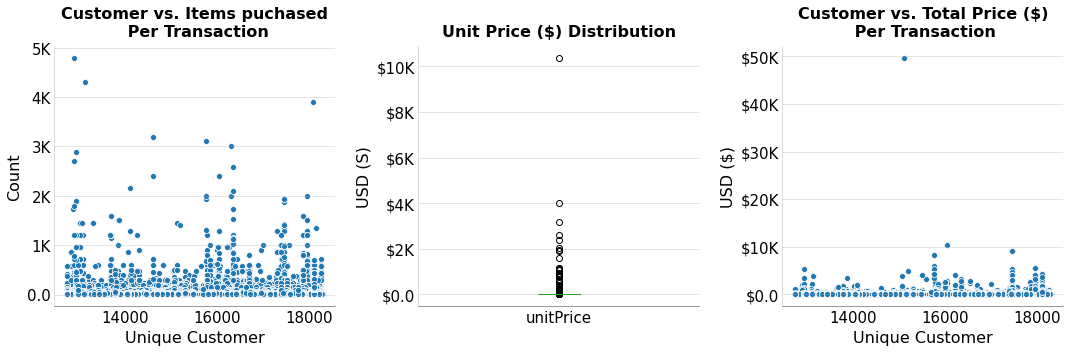

In [191]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))
# ---------------------------------------------------------------------------------------
sns.scatterplot(x=transactionHistory['customerID'],
                y=transactionHistory['quantity'], ax=ax[0])
modifyChartBasic(ax[0], "Customer vs. Items puchased\n Per Transaction", 13,
                 xLabel='Unique Customer', yLabel='Count', titleSize=16)
modifyChartExtra(ax[0], grid='y')
ax[0].set_yticklabels([human_format(i, precision=0)
                       for i in ax[0].get_yticks()])
# ----------------------------------------------------------------------------------------
transactionHistory['unitPrice'].plot.box(ax=ax[1], figsize=(15, 5))
modifyChartBasic(ax[1], "Unit Price ($) Distribution",
                 13, yLabel='USD (S)', titleSize=16)
modifyChartExtra(ax[1], grid='y')
ax[1].set_yticklabels(
    [f'${human_format(i,precision=0)}' for i in ax[1].get_yticks()])
# ---------------------------------------------------------------------------------------
sns.scatterplot(x=transactionHistory['customerID'],
                y=transactionHistory['totalPrice'], ax=ax[2])
modifyChartBasic(ax[2], "Customer vs. Total Price ($)\n Per Transaction", 13,
                 xLabel='Unique Customer', yLabel='USD ($)', titleSize=16)
modifyChartExtra(ax[2], grid='y')
ax[2].set_yticklabels(
    [f'${human_format(i,precision=0)}' for i in ax[2].get_yticks()])
plt.tight_layout()

**Per transaction**, we can see that most customers buy under 1,000 items of which predominately costs less then \\$<500 and spent between \\$0.01 to \\$5,000 on the online store. Some outliers such as the high $50,000 order made by one customer can be considered outliers. Without knowing further context though, we won't treat them as such since no models will be built using this data (K-means was tried). 

The company should look into buyers purchasing large quantity of items as well as those who spend the most in the store. From the looks of it, there might be a B2B component that the company can potentially build with such customers. 

What's the median number of orders made for the year?

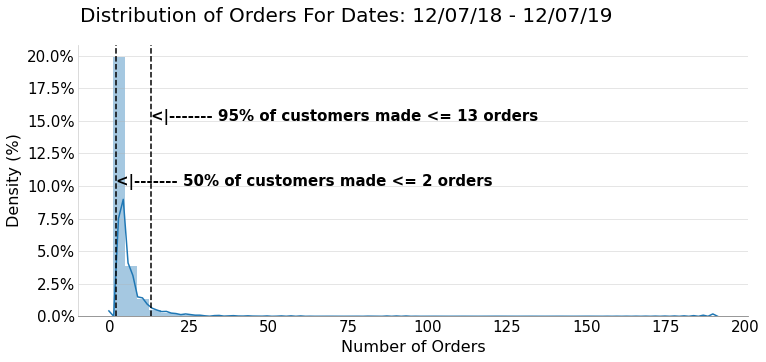

In [347]:
orders = transactionHistory.groupby('customerID').agg({"orderID": 'nunique'})
fig, ax = plt.subplots(figsize=(12, 5))
sns.distplot(orders, ax=ax)
ax.set_yticklabels([f'{i*100:.1f}%' for i in ax.get_yticks()])
modifyChartBasic(ax, '', 13,
                 xLabel='Number of Orders', yLabel='Density (%)', titleSize=16)

quantile50, quantile95 = orders['orderID'].quantile(
    .50), orders['orderID'].quantile(.95)
plt.axvline(quantile50, linestyle='--', color='black')
plt.text(quantile50, ax.get_yticks()[
         4], f'<|------- 50% of customers made <= {int(quantile50)} orders', fontsize=15, fontweight='semibold')
plt.axvline(quantile95, linestyle='--', color='black')
plt.text(quantile95, ax.get_yticks()[
         6], f'<|------- 95% of customers made <= {int(quantile95)} orders', fontsize=15, fontweight='semibold')
modifyChartExtra(ax, grid='y')
plt.title("Distribution of Orders For Dates: 12/07/18 - 12/07/19",
          x=.4, y=1.06, fontsize=20)
plt.show()

95% of customers mad less than 14 orders and half of total customers made 2 orders or less. With such low number of orders made for the year and figures seen previously, it's highly likely that most of the customers for the store are predominantly. wholesalers.

### **Note,** transactions were still inspected as it represented a unique product that a customer bought within one order. We'll hypothetically say that the company was interested in figures at the transactional level rather than single orders. Therefore, the analyses will rely more on transactional analysis at the product level.

Let's check the maximum value per variables used above to get a better understanding of them.

In [34]:
display(transactionHistory.iloc[np.where(transactionHistory['unitPrice'] == transactionHistory['unitPrice'].max())],
        transactionHistory.iloc[np.where(
            transactionHistory['quantity'] == transactionHistory['quantity'].max())],
        transactionHistory.iloc[np.where(transactionHistory['totalPrice'] == transactionHistory['totalPrice'].max())])

,orderID,itemID,description,quantity,orderDate,unitPrice,customerID,month,day,year,isWeekend,quarter,hour,totalPrice
91214,551697,POST,POSTAGE,1,2019-05-01 13:46:00,10386.160714,16029.0,5,2019-05-01,2019,0,2,13,10386.160714


,orderID,itemID,description,quantity,orderDate,unitPrice,customerID,month,day,year,isWeekend,quarter,hour,totalPrice
254409,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2019-10-25 12:26:00,0.267857,12901.0,10,2019-10-25,2019,0,4,12,1285.714286


,orderID,itemID,description,quantity,orderDate,unitPrice,customerID,month,day,year,isWeekend,quarter,hour,totalPrice
123274,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2019-06-08 15:28:00,828.443878,15098.0,6,2019-06-08,2019,1,2,15,49706.632653


1. The most expensive item sold is a postage. The product can potentially be an antique.
2. Customer 573008 seems to be a business given the quantity bought 4,800 at a single point of time. Time of purchase is also of interest (nearing holiday).
3. Within one order, customer 15098 spent close to \\$49.7k on 60 bundles consisting of 60 picnic baskets each. Product promotions for this item should  be sent to the customer.

In [35]:
display(transactionHistory['unitPrice'].quantile([.95]))
display(transactionHistory['quantity'].quantile([.95]))
display(transactionHistory['totalPrice'].quantile([.95]))

0.95    10.841837
Name: unitPrice, dtype: float64

0.95    36.0
Name: quantity, dtype: float64

0.95    75.765306
Name: totalPrice, dtype: float64

When we look at the percentiles of the variables investigated above we can see that 95% of transactions:
1. Had products with a unit price less that or equal to \\$8.5
2. Consisted of 36 or less items
3. Cost a total of \\$59 or less

In [268]:
# get total number of items and price for each unique order
transactionHistory.groupby('orderID').agg(
    {'quantity': 'sum', 'totalPrice': 'sum', }).median()

quantity      150.00000
totalPrice    375.96301
dtype: float64

On average, on a given order, a customer will purchase 533 items at a total price of \\$533.07. Such high amounts reflect buying behavior for wholesalers rather than individuals. Now having a rough understanding of the company's customers, let's take a look at patterns by accounting for dates now. We'll start with distribution of purchases made per day and month.

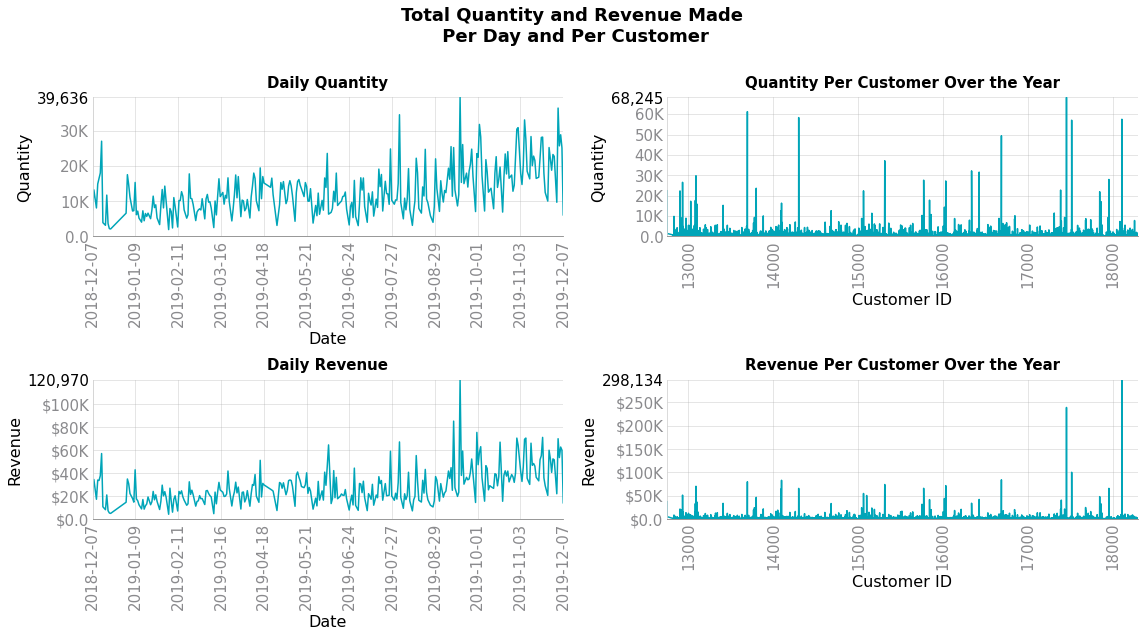

In [36]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(15, 5))
axes = [(row, col) for row in range(2) for col in range(2)]
dateNVariable = [("day", "quantity"), ("customerID", "quantity"),
                 ("day", "totalPrice"), ("customerID", "totalPrice")]
data = transactionHistory.copy()

for dateNVariable, i in zip(dateNVariable, axes):
    date, variable = dateNVariable[0], dateNVariable[1]
    df = (data.groupby(date)
          .agg({variable: 'sum'})  # sum of quantity/total price
          .reset_index().sort_values(date))
    df.plot.line(x=date, y=variable, figsize=(16, 8),
                 legend=False, rot=90, ax=ax[i], color='#00A5B8')

    #ticks and limits
    ax[i].set_xlim(df[date].min(), df[date].max())
    if date == 'day':
        ax[i].set_xticks(pd.date_range(df[date].min(), df[date].max(), 12))
        ax[i].set_xticklabels([
            i.date()  # set x tick labels as date format and in 12 intervals
            for i in (pd.date_range(df[date].min(), df[date].max(), 12))])

    variableTitle = 'Revenue' if variable == 'totalPrice' else variable.title()
    title = f"{variableTitle} Per Customer Over the Year" if date != 'day' else f"Daily {variableTitle}"
    ylabel = 'Revenue' if variable == 'totalPrice' else 'Quantity'
    xlabel = 'Date' if date == 'day' else 'Customer ID'
    modifyChartBasic(ax[i], title, 13, titleSize=15,
                     xLabel=xlabel, yLabel=ylabel)
    modifyChartExtra(ax[i], grid='both', maxs=df[variable].max(),
                     grayTickLabels=True, highlightTop=True)
    ax[i].set_yticklabels([f'${human_format(i,precision=0)}' if variable == 'totalPrice'
                           else f'{human_format(i,precision=0)}' for i in ax[i].get_yticks()[:-1]
                           ]+[f'{ax[i].get_yticks()[-1]:,.0f}'])

plt.suptitle("Total Quantity and Revenue Made\n Per Day and Per Customer",
             fontsize=18, y=1.1, fontweight='bold')
plt.tight_layout()

Summary:
1. The later months see the most purchases in the months of July to December with trends between those months .
2. August was the most profitable month for the store of which may have been due to the large quantity spent during that month.
3. A selective few customers bring more than \\$50k to the company over the year; top two customers each bringing ~\\$245k and ~\\$298.1k.
4. There seems to be customers who buy large quantities of low unit price items as indicated by the difference in year quantity and year revenue per customer graphs; top two customers seem to buy expensive items as the revenue graph shows them trumping the others in terms of money spent on the store.

Let's take a look at the variables in our dataframe with less than 500 unique values (any more is computationally taxing).

In [37]:
columnsForChart = getRidOfColumnsWithManyValues(transactionHistory)
print(len(columnsForChart))

8


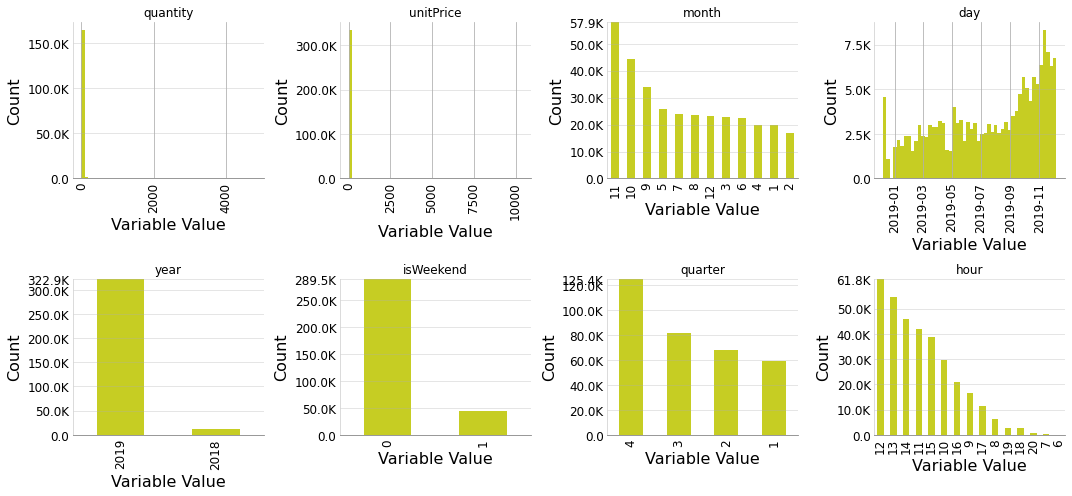

In [38]:
fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(15, 7))
axes = [(row, col) for row in range(2) for col in range(4)]
data = transactionHistory.copy()

for col, i in zip(columnsForChart, axes):
    if data[col].nunique() < 50:
        data[col].value_counts().plot.bar(ax=ax[i], color='#C6CD23')
        maxs = data[col].value_counts().max()
    else:
        data[col].hist(bins=50, ax=ax[i], color='#C6CD23', xrot=90)
        maxs = False
    modifyChartExtra(ax[i], grid='y', maxs=maxs)
    modifyChartBasic(ax[i], f'{col}', 12,
                     xLabel='Variable Value', yLabel='Count')
    ax[i].set_yticklabels([human_format(i, precision=1)
                           for i in ax[i].get_yticks()])
plt.tight_layout()

## Relevant points: 
1. Clear outliers in quantity and unit price. As mentioned, this might be normal for the store given that (1) customer may be a business and (2) the store may be selling item(s) considered to be antiques (hence large price tag).
2. Most transactions are made in the 4th quarter. 

What quarter brings in the most revenue?

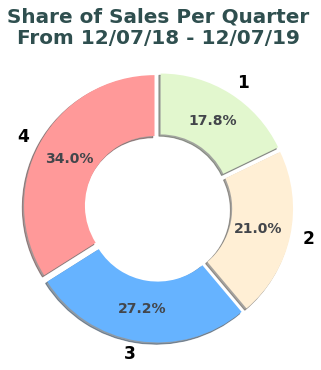

In [39]:
groups = (transactionHistory.groupby("quarter")  # quarter
          .agg({'quantity': 'sum'})  # total items bought
          .reset_index().sort_values('quarter', ascending=False))  # in descending order by quarter
explode = (0.05, 0.05, 0.05, 0.05)

patches, texts, autotexts = plt.pie(
    groups['quantity'].divide(groups['quantity'].sum()),  # relative value
    shadow=True, colors=['#ff9999', '#66b3ff', 'papayawhip', '#E2F7CE'],
    labels=groups['quarter'], autopct='%1.1f%%',
    textprops={'fontsize': 17, 'fontweight': 'bold'}, wedgeprops=dict(width=0.7),
    explode=explode, startangle=90, pctdistance=0.75, radius=1.5)

for text in autotexts:
    text.set_fontsize(14)
    text.set_color('#43464b')
plt.title(f"Share of Sales Per Quarter\nFrom 12/07/18 - 12/07/19", pad=55, size=20, x=.5,
          fontweight='bold', color='darkslategray', fontname='sans-serif')
plt.show()

- More than 1/3 of revenue is earned during months in the 4th quarter with the first quarter bringing in the least.
- Sales increase over each quarter 

What hour do customers make the most purchases?

In [286]:
hourOrders = transactionHistory.groupby('hour').agg({"orderID": "nunique"})

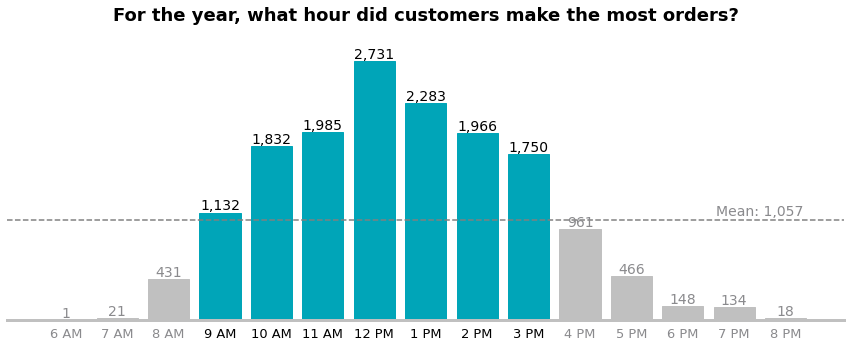

In [312]:
fig = plt.figure(figsize=(15, 5))
ax = plt.gca()
ax.bar(x=list(map(turnIntoAMPM, hourOrders.index)),
       height=hourOrders['orderID'], color='#00A5B8')
modifyChartBasic(ax, '', 13)
ax.set_yticklabels([])
ax.spines['left'].set_visible(False)  # left spine and ticks off
ax.spines['bottom'].set_linewidth(3)
ax.spines['bottom'].set_color('silver')  # bottom spine adjustments

# for average line
Mean = hourOrders.mean() .iloc[0]
plt.axhline(Mean, color='gray', linestyle='--')
plt.text(ax.patches[-2].get_x()+.05, Mean+50,
         f'Mean: {int(Mean):,}', color='#8a8a8d', fontsize=14)

# annotation bars with their respective values
for bar in ax.patches:
    # gray bar if value less than mean
    bar.set_color('#00A5B8' if bar.get_height() > Mean else 'silver')
    plt.text((bar.get_x() + bar.get_width() / 2), bar.get_height(), s=f'{bar.get_height():,}',
             ha='center', va='bottom', fontsize=14, color='black' if bar.get_height() > Mean else '#8a8a8d')
# gray tick labels if value less than mean
[ax.get_xticklabels()[i].set_color('#8a8a8d')
 if rec.get_height() < Mean else 'black' for i, rec in zip(range(len(ax.patches)), ax.patches)]

plt.title("For the year, what hour did customers make the most orders?",
          fontsize=18, y=1.08, fontweight='semibold')
plt.show()

- In terms of purchases, 12 to 2 pm are the online store's peak hours. 
- The company can expect most revenue to have been made during 10 am to 4 pm. 

(**Note:** may differ given timezone differences; shows distribution based on **time log of software**)

Who are the top paying customers and how much $ did they spend over the year?

Total revenue $8,453,539 Customers: 3851


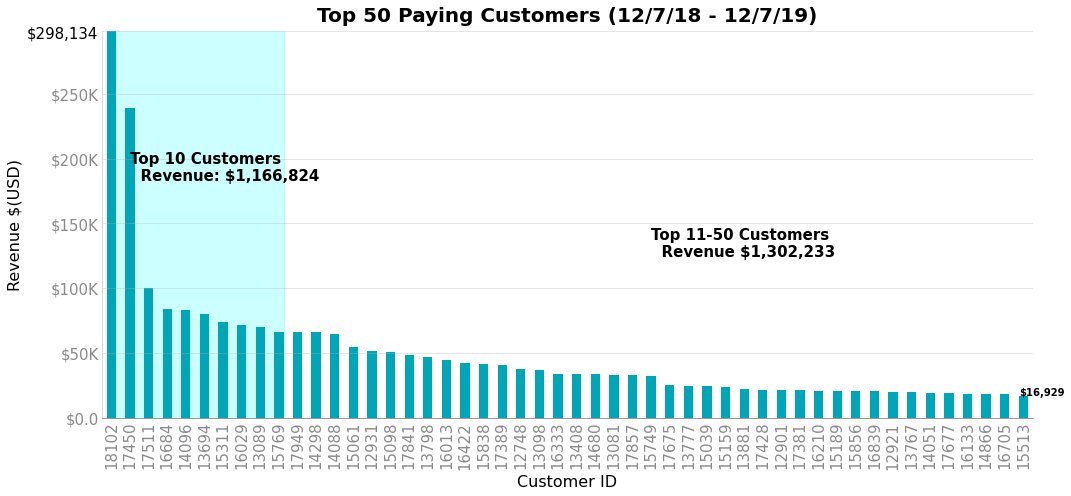

In [41]:
fig, ax = plt.subplots(figsize=(15, 7))
(transactionHistory.groupby("customerID")  # unique customers
 .agg({"totalPrice": "sum"})  # total dollar spent
 .sort_values("totalPrice").tail(50)  # sorted -> top 50
 # in ascending order by dollars spent
 .sort_values('totalPrice', ascending=False)
 # bar plot
 .plot.bar(ax=ax, color='#00A5B8' if i != 0 else '#C6CD23', legend=False)
 )
plt.fill_between((0, 9.3), ax.get_yticks()[-1], 0, color='cyan', alpha=0.2)

# Text variables for plot
top10Revenue = f'${sum([i.get_height() for i in ax.patches[:10]]):,.0f}'
otherTopRevenue = f'${sum([i.get_height() for i in ax.patches[10:]]):,.0f}'
val, labels = [top10Revenue, otherTopRevenue], [
    'Top 10 Customers\n  Revenue:', 'Top 11-50 Customers\n  Revenue']
cor = [(4, ax.patches[4].get_height()), (32, ax.patches[32].get_height())]
# plotting text
[plt.text(x=xy[0]-3, y=xy[1]+100000, s=f"{label} {val}", color='black', fontsize=15,
          fontweight='bold',) for val, xy, label in zip(val, cor, labels)]
# extra adjustments
maxValue = max([(patch.get_height(), patch)  # value, child (ie. spine, rectangle)
                for patch in ax.get_children()
                if type(patch) == matplotlib.patches.Rectangle], key=lambda x: x[0])[0]
modifyChartBasic(ax, 'Top 50 Paying Customers (12/7/18 - 12/7/19)', 13,
                 titleSize=20, xLabel="Customer ID", yLabel='Revenue $(USD)')
modifyChartExtra(ax, grid='y', maxs=maxValue,
                 grayTickLabels=True, highlightTop=True)

# x and y tick labels with text annotation for last bar
ax.set_yticklabels([f"${human_format(i,precision=0)}" for i in ax.get_yticks()[
                   :-1]]+[f'${ax.get_yticks()[-1]:,.0f}'])
# turn into integer rather than float
ax.set_xticklabels([int(float(i.get_text())) for i in ax.get_xticklabels()])
plt.text(ax.patches[-1].get_x(), ax.patches[-1].get_height(),
         f"${ax.patches[-1].get_height():,.0f}", fontweight='bold')

plt.tight_layout()
print(f"Total revenue ${transactionHistory.totalPrice.sum().sum():,.0f}",
      'Customers:', transactionHistory['customerID'].nunique())

In [42]:
f'${int(top10Revenue.replace(",","").replace("$",""))+int(otherTopRevenue.replace(",","").replace("$","")):,.0f}'

'$2,469,057'

- **Top 50 customers** made up **almost 30%** (~\\$2.5 mil) of **total revenue** (~\\$8.45 mil). The rest of the customers (n =3,801) brought in the other 70% of purchases. 
    - It's very likely that these stores are wholesalers and as such should deserve more attention from the company.
- Top 10 customers brought  ~\\$1.15 mil whilst the others top 40 brought in ~\\$1.30 mil. 
- Customers **`18102 and 17450`** should be given special consideration based of their yearly revenue brought in by their purchases (total sum around ~**\\$550k**). 

<a id='5'></a>

# 5. Product Category Clustering - EDA (continue edit here)

Let's now shift our attention to exploring the products by creating categories out of them. It should be noted that this will be for exploratory analyses only due to computational constraints. Nonetheless, this section should provide a rough summary of the product and their categories.

Let's start by looking at words in the description columns to look for ways to pre-process it.

In [43]:
counts = count_values(transactionHistory['description'].apply(lambda x: x.split()).reset_index(), 'description')
print([val for val in counts.keys()][:400])

['HOMEMADE', 'JAM', 'SCENTED', 'CANDLES', 'OCEAN', 'SCENT', 'CANDLE', 'IN', 'JEWELLED', 'BOX', 'CREAM', 'SWEETHEART', 'MINI', 'CHEST', 'WOOD', '2', 'DRAWER', 'CABINET', 'WHITE', 'FINISH', 'S/3', 'ANT', 'GRAND', 'CHOCOLATECANDLE', 'SET/3', 'ROSE', 'JEWEL', 'VANILLA', 'NATURAL', 'SLATE', 'HEART', 'CHALKBOARD', 'HOME', 'BUILDING', 'BLOCK', 'WORD', 'WOODEN', 'PICTURE', 'FRAME', 'ANTIQUE', 'GAOLERS', 'KEYS', 'DECORATIVE', 'GARDEN', 'GLASS', 'STAR', 'FROSTED', 'T-LIGHT', 'HOLDER', 'CINNAMON', 'VOTIVE', 'ORANGE', 'IVORY', 'LOVE', 'BIRD', 'BLACK', 'SILVER', 'LATTICE', 'POT', 'S/4', 'BOWL', 'CUT', 'OCTAGON', 'CLOCHE', 'SMALL', 'COLOUR', 'GLASS.', 'SQUARE', 'CANDLESTICK', 'DECORATION', 'ALL', 'TRELLIS', 'CANDLEPOT', 'GREY', 'HOT', 'WATER', 'BOTTLE', 'SET/6', 'S/15', 'BAUBLES', 'BAG', 'SOAP', 'DISH', 'BROCANTE', 'CHRISTMAS', 'METAL', 'TAGS', 'ASSORTED', 'LARGE', 'RED', 'BABY', 'BUNTING', 'HANGING', 'LANTERN', 'ALARM', 'CLOCK', 'BAKELIKE', 'GREEN', 'ROUND', 'CAKE', 'TIN', 'VINTAGE', 'OF', 'WICKER'

We can see that there seems to be some words that may be filtered out. I decided to filter out special characters, colors, and numbers from the description columns. 

In [44]:
charsToSkip = "!@#$%^&*()[]{};:,./<>?\|`~-=_+"
rePattern = ['pink', 'blue', 'grey', 'brown', 'purple',
             'black', 'red', 'green', 'orange', 'white', '[0-9]']


def removeSelectWords(strings):
    """
    Remove special characters, colors, and numbers from word decription
    """
    newString = strings.translate({ord(c): "" for c in charsToSkip}).strip()
    for pattern in rePattern:
        newString = re.sub(pattern, '', newString).strip()
    return ''.join(newString)

Now let's filter out the special characters and words defined above.

In [45]:
transactionHistory['description'] =transactionHistory['description'].apply(lambda x: removeSelectWords(x.lower()))

Next up, we'll filter out English stop words from the column as they won't provide any relevance when grouping the categories together.

In [46]:
# setting stop words
stop_words = set(stopwords.words('english'))

# removing stop words
words = transactionHistory['description'].apply(
    lambda words: [w for w in words.split() if not w in stop_words])

# initialize the wordnet lemmatizer
wordnet_lemma = WordNetLemmatizer()

# lemmatize nouns
lemmas = words.apply(
    lambda x: [wordnet_lemma.lemmatize(w, pos='n') for w in x])

# join preprocessed words back together and save as words in dataframe
transactionHistory['words'] = lemmas.str.join(' ')

**At this stage, no assumptions in K-Means was checked -> sorry Anastasia, was in a hurry to turn in after taking a long time**

For clustering, we will be using Facebook's fastText library to train an unsupervised classifier (no labels-target variable). From there, we will be using the output from this model to cluster the words using the K-means algorithm.

Per Facebook's fastText library description, the library is used "for efficient learning of word representations and sentence classification." Explaining the classifier is not within my current knowledge but I thought I'd attach their code reference:

train_unsupervised: 

    """
    Train an unsupervised model and return a model object.
    input must be a filepath. The input text does not need to be tokenized
    as per the tokenize function, but it must be preprocessed and encoded
    as UTF-8. You might want to consult standard preprocessing scripts such
    as tokenizer.perl mentioned here: http://www.statmt.org/wmt07/baseline.html
    The input field must not contain any labels or use the specified label prefix
    unless it is ok for those words to be ignored. For an example consult the
    dataset pulled by the example script word-vector-example.sh, which is
    part of the fastText repository.
    """
    
 See <a href="https://fasttext.cc/docs/en/unsupervised-tutorial.html">docs</a> for more information.

## 5.1  Clustering

In [372]:
# saving preprocessed words column to a text file in utf-8
with open('file.txt', 'a') as f:
    f.write(transactionHistory['words'].to_csv(
        header=False, index=False, encoding="utf-8"))
# training with vectors set at a size of 300 dimensions
ft_model = fasttext.train_unsupervised('file.txt', dim=300)
# get vectors
transactionHistory['vec'] = transactionHistory['words'].apply(
    lambda x: ft_model.get_sentence_vector(x))
# save as X for elbow plot
X = np.asarray(list(transactionHistory['vec'].values))

Next, since the K-means model is unsupervised and hence performance can be difficult to quantify, we'll go ahead and use the commonly used elbow method to attempt to define our starting cluster (K) for use in the K means model. 

For obtaining the plot values:
1. Loop over 2 to 11 Ks (clusters) (center points of K selected at random)
2. Save the intertia/within-cluster sum-of-squares (sum of distance for each point to its cluster center)
3. Plot a scatterplot (x will be K and y will be intertia score)
4. Choose the elbow (or point where curve start converting into line) as K  ; adding a cluster won't give as much improvement in modeling of the data.

In [10]:
distortions = []
K = range(2, 11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Based on the plot, we'll be using 5 clusters as it looks like the closest to the middle.


In [322]:
kmeans = KMeans(5)
transactionaHistory['clusters'] = kmeans.fit_predict(
    X)  # vectorized words from text classifier
transactionHistory['clusters'] = transactionHistory['clusters'].apply(
    lambda x: x+1)
[transactionHistory['clusters'].value_counts(
    normalize=i).sort_values(ascending=False) for i in [True, False]]

[4    0.285334
 6    0.233272
 5    0.181114
 1    0.154926
 2    0.102078
 3    0.043276
 Name: clusters, dtype: float64, 4    95380
 6    77977
 5    60542
 1    51788
 2    34122
 3    14466
 Name: clusters, dtype: int64]

Roughly 40% of products got placed into the 4th and 6th clusters. We'll keep this in mind for further analysis.

Let's take a look at the clusters that were formed using wordclouds.

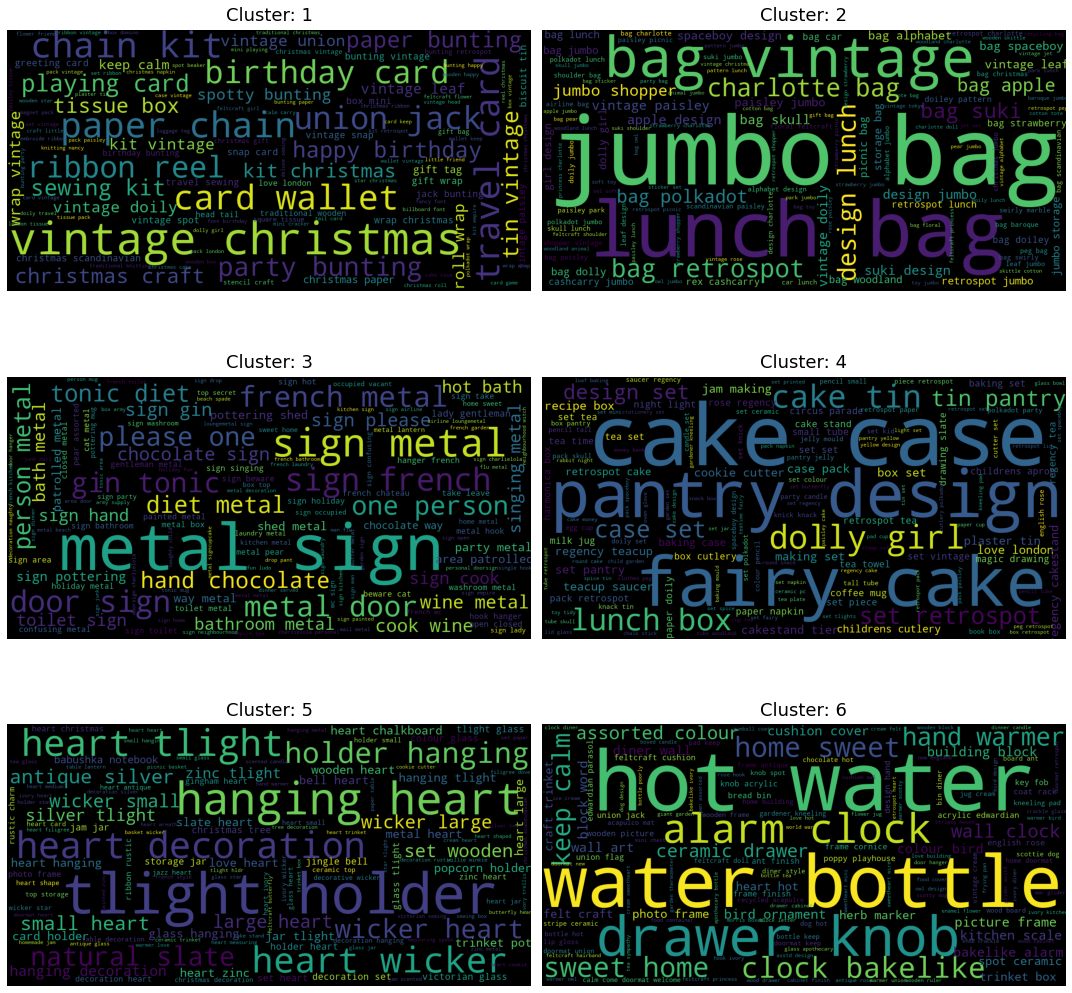

In [324]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = [(row, col) for row in range(3) for col in range(2)]
for clust, i in zip(sorted(list(transactionHistory['clusters'].unique())), axes):
    cluster = transactionHistory.query("clusters==@clust")['words'].to_list()
    text = ' '.join(cluster)
    # lower max_font_size, change the maximum number of word and lighten the background:
    wordcloud = WordCloud(scale=3).generate(text)
    # Display the generated image:
    plt.sca(ax[i])
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(f'Cluster: {clust}', fontsize=18, y=1.01)
ax[axes[-1]].set_axis_off()
plt.tight_layout()

Roughly speaking, the clusters seem to be characterized by
- Cluster 1: Holiday items (card, Christmas, ribbon)
- Cluster 2: Bags or purses
- Cluster 3: Home signs (metal sign,'keep calm' sign, 'home sweet home') 
- Cluster 4: Pantry items (cake, coffee mug)
- Cluster 5: Home decoration (wicker heart, hanging heart)
- Cluster 6: Other (water bottle,alarm clock etc).

In [325]:
clusterAgg = transactionHistory.groupby(['clusters']).agg(
    {"quantity": "sum", "totalPrice": "sum"})

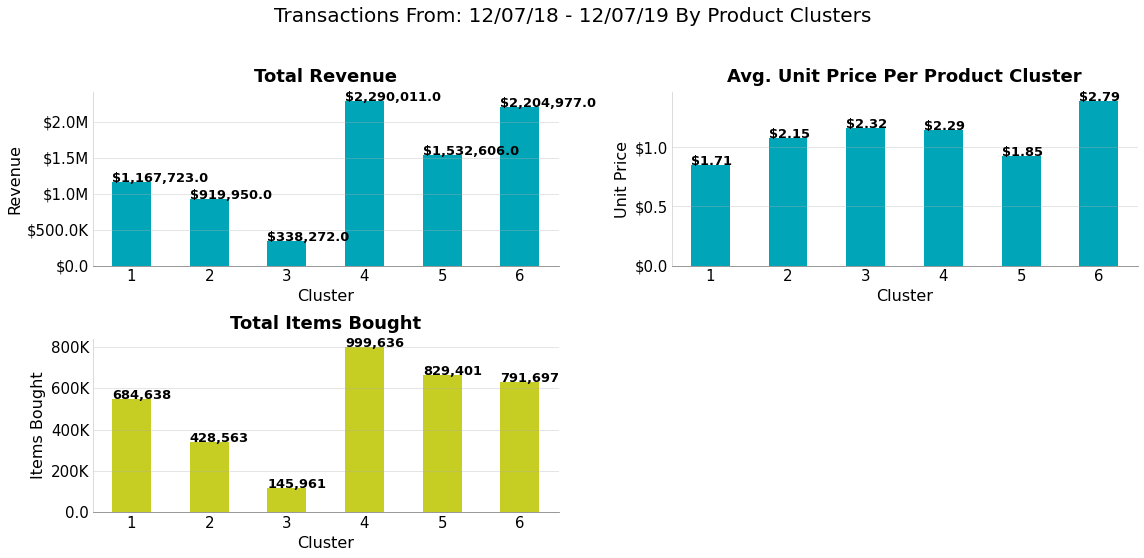

In [326]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(16, 7))
clusterAgg['quantity'].plot.bar(
    ax=ax[1, 0], rot=0, color='#C6CD23')  # quantity
clusterAgg['totalPrice'].plot.bar(
    ax=ax[0, 0], rot=0, color='#00A5B8')  # revenue
(clusterAgg['totalPrice'] / clusterAgg['quantity']
 ).plot.bar(ax=ax[0, 1], rot=0, legend=False, color='#00A5B8')

[ax[i].set_yticklabels([f'${human_format(val,precision=1)}' for val in ax[i].get_yticks()])
 for i in [(0, 0), (0, 1)]]  # total revenue
[ax[1, 0].set_yticklabels([human_format(val, precision=0)
                           for val in ax[1, 0].get_yticks()])]  # quantity

[ax[1, 0].text(rec.get_x(), rec.get_height(), f'{rec.get_height():,.0f}',
               fontsize=13, fontweight='bold') for rec in ax[1, 0].patches]
[[ax[i].text(rec.get_x(), rec.get_height(), f'${round(rec.get_height(),precision):,}',
             fontsize=13, fontweight='bold') for rec in ax[i].patches] for i, precision in zip([(0, 0), (0, 1)], [0, 2])]

[modifyChartBasic(ax[i], text, 13, titleSize=18, xLabel='Cluster', yLabel=' '.join(text.split()[1:3]))
    for text, i in zip(['Total Revenue', 'Avg. Unit Price Per Product Cluster', 'Total Items Bought'], [(0, 0), (0, 1), (1, 0)])]
[modifyChartExtra(ax[i], grid='y') for i in [(0, 0), (1, 0), (0, 1)]]

plt.suptitle(
    'Transactions From: 12/07/18 - 12/07/19 By Product Clusters', fontsize=20, y=1.10)
ax[(1, 1)].axis('off')
plt.tight_layout()

In [343]:
2.79 - 2.32

0.4700000000000002

Without info on costs, here's a short albeit limited analysis on our clusters. On the aggregate level:
- Products in cluster 6,on average cost ~\\$.47 to \\$1 more relative to the other clusters. The impact of this shows in the total revenue and items bough chart: Cluster 5 and 6 had roughly the same amount of quantity of items sold but cluster 6 saw more than \\$470k in revenue relative to cluster 5.
- Cluster 1 seems to contain products with the lowest price per item.
- Clusters 4 and 6 in terms of revenue, are the most valuable for the company. 

Let's create a bar plot for the top 25 customers to see which clusters brought in the most revenue amongst them.

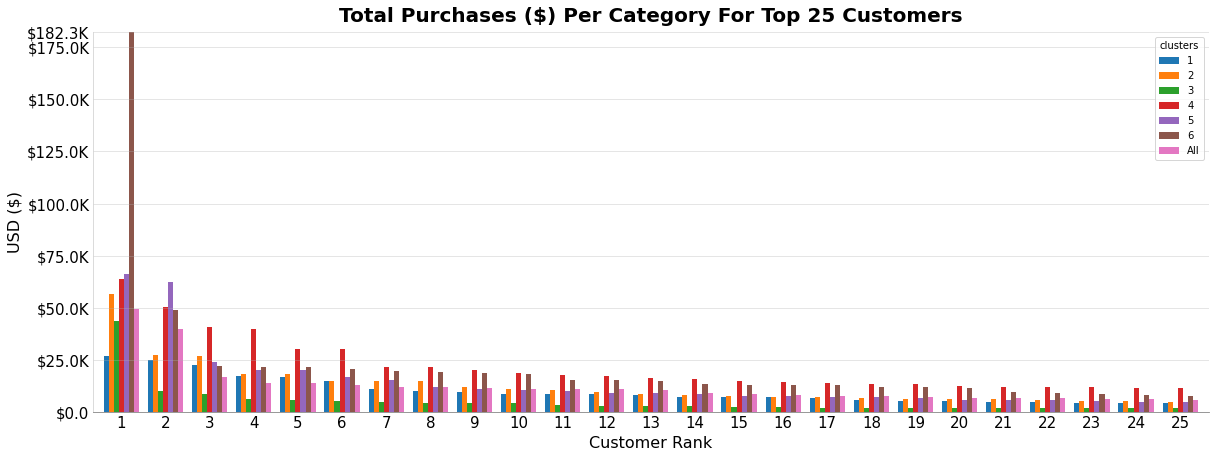

In [327]:
categoryPurchases = transactionHistory.pivot_table(
    index='customerID', columns='clusters', values='totalPrice', aggfunc='sum').fillna(0).assign(All=lambda x: x.mean(1))
fig, ax = plt.subplots(figsize=(20, 7))
chart = (categoryPurchases.apply(lambda x: x.sort_values().values)  # sorted across all columns
         .tail(25).iloc[::-1]  # sorted in descending order
         .plot.bar(ax=ax, width=.80, rot=0))

modifyChartBasic(ax, 'Total Purchases ($) Per Category For Top 25 Customers', 13,
                 xLabel='Customer Rank', yLabel='USD ($)', titleSize=20)
maxs = max([chart.patches[i].get_height() for i in range(len(chart.patches))])
modifyChartExtra(ax, maxs=maxs, grid='y')
ax.set_xticklabels([int(i)+1 for i in ax.get_xticks()])
ax.set_yticklabels(
    [f'${human_format(i,precision=1)}' for i in ax.get_yticks()])

plt.show()

- For the top customer, cluster 6 bring in the most revenue. Given the large revenue contribution, this may have affected the charts seen in the previous step. For that customer, the company should consider tailoring their offers around products in the cluster 6.
- For the other top customers, clusters 4 and 6 yielded the most revenue reflecting the observations seen in the chart earlier.

<a id='6'></a>

# 6. RFM Modeling

To segment the customers, we'll be using the RFM model: 

Definitions: 
- Recency = Latest Date - Last Invoice Data (**days since last purchase**)
- Frequency = number of transactions (**orders**)
- Monetary = Sum of **total purchases ($)** 

RFM segmentation is a method of identifying the most important types of customers by grouping them and giving scores to their recency, frequency and monetary values. The three aforementioned variables are strong indicators of a customer's future value and is commonly used to segment users/customers.

In [328]:
latestDate = transactionHistory['day'].max()

# Creating RFM Modelling scores for each customer
RFMScores = transactionHistory.groupby('customerID').agg(
    {'day': lambda x: (latestDate - x.max()).days,  # dys since last purchase
     "orderID": 'count',  # total number of transactions
     'totalPrice': lambda x: x.sum()})  # total revenue

# Convert Invoice Date into type int
RFMScores['day'] = RFMScores['day'].astype(int)  # converting day as integer

# Rename column names to Recency, Frequency and Monetary
RFMScores.rename(columns={'day': 'Recency',
                          'orderID': 'Frequency',
                          'totalPrice': 'Monetary'}, inplace=True)

RFMScores.reset_index().head()

,customerID,Recency,Frequency,Monetary
0,12747.0,2,96,4894.706633
1,12748.0,0,4019,37587.244898
2,12749.0,3,199,5217.959184
3,12820.0,3,59,1201.964286
4,12821.0,214,6,118.265306


Let's check the distributions of our customers.

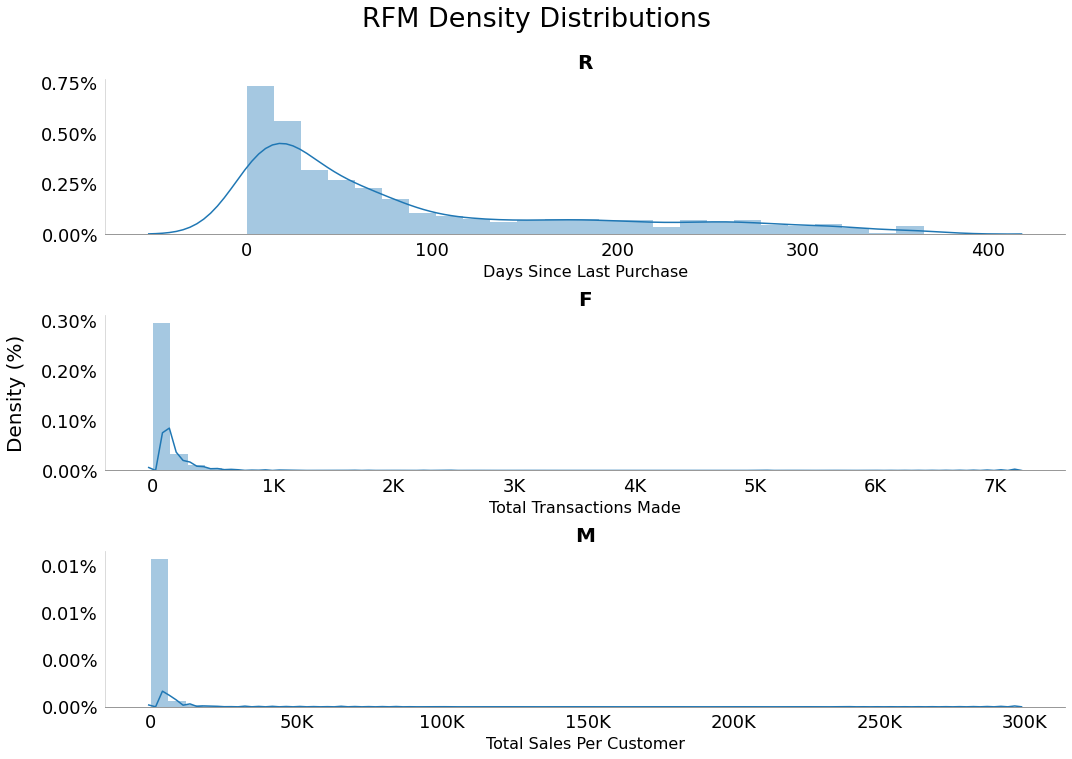

In [371]:
fig, ax = plt.subplots(figsize=(15, 10), nrows=3)
sns.distplot(RFMScores['Recency'], ax=ax[0])
sns.distplot(RFMScores['Frequency'], ax=ax[1])
sns.distplot(RFMScores['Monetary'], ax=ax[2])
xlabel = ['Days Since Last Purchase',
          'Total Transactions Made', 'Total Sales Per Customer']
[ax[x].set_yticklabels(
    [f'{i*100:.2f}%' for i in ax[x].get_yticks()], fontsize=15) for x in [0, 1, 2]]
[ax[x].set_xticklabels([human_format(int(i), precision=0)
                        for i in ax[x].get_xticks()], fontsize=15) for x in [0, 1, 2]]
[modifyChartBasic(ax[i], var, 18, titleSize=20, xLabel=x)
 for i, var, x in zip(range(0, 3), ['R', 'F', 'M'], xlabel)]
ax[1].set_ylabel('Density (%)', fontsize=20, labelpad=15)
plt.suptitle("RFM Density Distributions", y=1.05, fontsize=27)
plt.tight_layout(1.1)

Each variable is heavily skewed to the right with Frequency and Monetary values being extremely skewed to the right. This makes sense though if we are to consider the impact that the wholesalers have on monetary and frequency (see previous charts for reference). Since we'll split the segments into quantiles we will slightly account for this. It should be mentioned that frequency was the only one split using the Pareto (99.%-100% | 95.%-99% | 80.%-95% | 50.%-80% | 0%-50%) principle rather than using quantiles given the long tails in their distributions.

In [330]:
# Create labels for Recency and Frequency
# rency with 0 is good, recney with 4 is worst (reverse order)
r_labels = range(5, 0, -1)
f_labels, m_labels = range(1, 6), range(1, 6)  # more frequency the best
# [0,.50,.80,.95,.99,1]

# Assign these labels to 4 equal percentile groups
r_groups = pd.qcut(RFMScores['Recency'], q=5, labels=r_labels)
# Assign these labels to 4 equal percentile groups -> pareto prinicple
f_groups = pd.qcut(RFMScores['Frequency'], q=[
                   0, .50, .80, .95, .99, 1], labels=f_labels)
# Assign these labels to three equal percentile groups
m_groups = pd.qcut(RFMScores['Monetary'], q=[
                   0, .50, .80, .95, .99, 1], labels=m_labels)

# Create new columns R and F
RFMScores = RFMScores.assign(
    R=r_groups.values, F=f_groups.values, M=m_groups.values)

# Calculate and Add RFMGroup value column showing combined concatenated score of RFM
RFMScores['RFMGroup'] = RFMScores[['R', 'F', 'M']].applymap(str).sum(1)

print(RFMScores['RFMGroup'].nunique())
RFMScores.groupby(['RFMGroup']).agg(
    {"Recency": "mean", "Frequency": "mean", "Monetary": ['mean', 'count']})

84


Recency    Frequency      Monetary      
                mean         mean          mean count
RFMGroup                                             
111.0     257.996587    14.578498    320.818242   586
112.0     238.181818    22.250000   1196.355519    44
113.0     206.000000     7.666667   3075.578231     3
115.0     208.500000     4.000000  41116.326531     2
121.0     257.224138    59.879310    484.270320    58
...              ...          ...           ...   ...
544.0       4.621622   432.972973  11301.084528    37
545.0       3.000000   432.333333  97225.651927     9
553.0       6.818182   803.090909   4875.644712    11
554.0       2.800000  1151.800000  12317.926020    10
555.0       3.545455  2417.818182  53178.269944    11

[84 rows x 4 columns]

So 84 total combinations were made from the RFM scores.  The top customers (555 group) had an average of 3 days since last purchase date; these 11 customers made ~2,417 orders of which amounts to ~\\$53k in revenue over the year.

For defining the scores of our segment I used <a href="https://linpack-for-tableau.com/data-visualizations/tableau-dashboards/sales-dashboard/rfm-analysis/">LinPack For Tableau's</a> (all credit for this part goes to them) suggested segment score. I downloaded a table of which will be used as the scoring table.

In [331]:
# fill in null in R and F column
segmentDefinitions = pd.read_csv(
    r"C:\Users\garci\Downloads\RFM Matrix.png.csv", skiprows=1).fillna(method='ffill')


def retrieveSegment(R, F, M):
    try:
        return segmentDefinitions.query("Recency ==@R and Frequency == @F")[str(M)].iloc[0]
    except:
        return 'No Match'


# retrieve segment
RFMScores['segment'] = RFMScores.iloc[:, 3:-
                                      1].applymap(int).apply(lambda x: retrieveSegment(x[0], x[1], x[2]), 1)

segmentDefinitions

,Recency,Frequency,5,4,3,2,1
0,5.0,5,Champions,Champions,Loyal,Potential Loyalist,Potential Loyalist
1,5.0,4,Champions,Champions,Loyal,Potential Loyalist,Potential Loyalist
2,5.0,3,Potential Loyalist,Potential Loyalist,Potential Loyalist,Potential Loyalist,Potential Loyalist
3,5.0,2,Promising,Promising,Promising,New Customers,New Customers
4,5.0,1,Promising,Promising,Promising,New Customers,New Customers
5,4.0,5,Champions,Champions,Loyal,Potential Loyalist,Potential Loyalist
6,4.0,4,Champions,Champions,Loyal,Potential Loyalist,Potential Loyalist
7,4.0,3,Potential Loyalist,Potential Loyalist,Potential Loyalist,Potential Loyalist,Potential Loyalist
8,4.0,2,Promising,Promising,Promising,New Customers,New Customers
9,4.0,1,Promising,Promising,Promising,New Customers,New Customers


With the segments labeled, let's plot a Treemap based of the resulting segments.

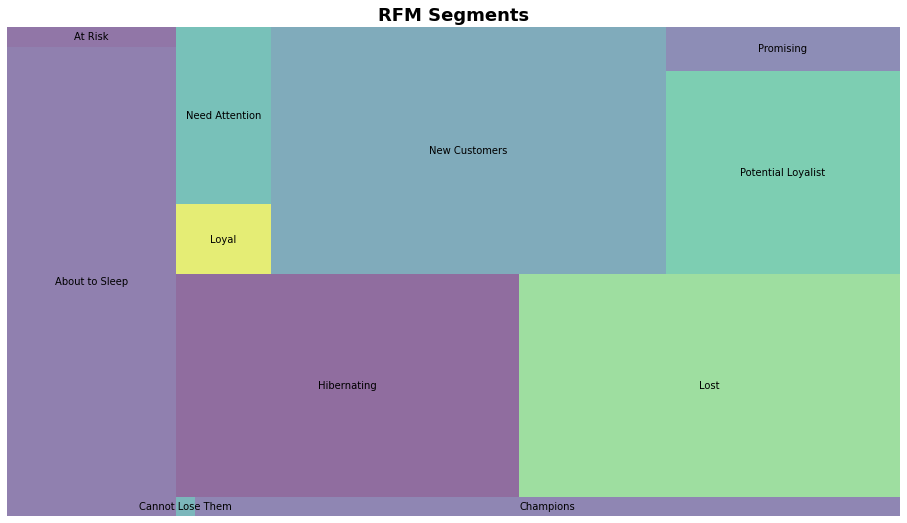

In [332]:
# Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=df['Customer Count'],
              label=df.index, alpha=.6)
plt.title("RFM Segments", fontsize=18, fontweight="bold")
plt.axis('off')
plt.show()

Based on the Treemap, a large portion of the company's customers are considered to be either new, lost, about to sleep or hibernating customers with champions and 'cannot lose them' customers representing the least of the total customers.

Given my lack of knowledge in this area, I erred with getting general recommendations for segments based off Anish Nair's article. See <a href="https://www.putler.com/rfm-analysis/">here</a> for reference. **All credit** goes to him for the recommendations. (My conclusions will be my own thoughts but segment recommendations will be used for Tableau dashboard.)

In [4]:
recommendations = pd.read_csv(
    r"C:\Users\garci\Downloads\Screenshot_421.png.csv")
recommendations['Customer Segment'].unique(), RFMScores['segment'].unique()

We'll need to make some slight adjustment to the segment names in order to map them. After doing that, we'll create two columns: Activity (describing segment) and Recommendations (recommendation for treating segment).

In [334]:
change = {"Can't Lose Them": 'Cannot Lose Them', 'Loyal Customers': 'Loyal',
          'Customers Needing Attention': 'Need Attention', 'Recent Customers': 'New Customers'}
recommendations['Customer Segment'] = recommendations['Customer Segment'].map(
    lambda x: change[x].strip() if x in change.keys()else x.strip())

# to apply across columns in rfm dataframe
recommendations = recommendations.set_index(['Customer Segment']).T.to_dict()

# create list containing relevant values (activity and tip)
RFMScores['label'] = RFMScores['segment'].apply(lambda x: [recommendations[x.title(
)]['Activity'], recommendations[x.title()]['Actionable Tip']])

# create new columns from list and then drop label as it contains redundant data
RFMScores = RFMScores.assign(activity=lambda x: x['label'].apply(lambda x: x[0]),
                             actionableTip=lambda x: x['label'].apply(lambda x: x[1])).drop(columns='label')

At this point, I got all the data I needed for creating the RFM and product dashboard. Data used for Tableau dashboard:

 `RFMScores.to_csv("profile.csv")`

 `transactionHistory[['itemID', 'description', 'quantity', 'orderDate','totalPrice',
       'unitPrice', 'customerID']].to_csv("transactions.csv")`

In [335]:
profiles = RFMScores[['Recency', 'Frequency',
                      'Monetary', 'R', 'F', 'M', 'segment']]

# Group by segment and retrieve revenue per product cluster, avg. RFM values, and total count
df = profiles.groupby("segment").agg({'Recency': 'mean',
                                      'Frequency': 'mean', 'Monetary': ['mean', 'count']})
df.columns = ['avg_recency', 'avg_frequency',
              'Monetary Value', 'Customer Count']

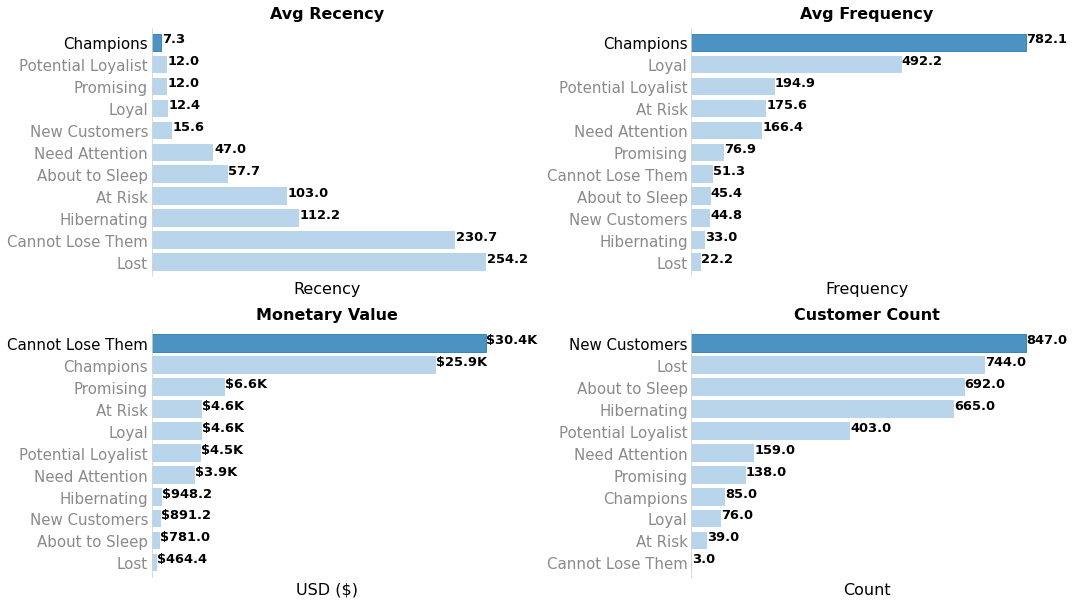

In [336]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(15, 8.5))
axes = [(row, col) for row in range(2) for col in range(2)]
for col, i in zip(df.columns[:4], axes):
    df[col].sort_values(ascending=False if col == 'avg_recency' else True).plot.barh(ax=ax[i], width=.80, rot=0,
                                                                                     alpha=.7, color='#9CC4E4')
    modifyChartExtra(ax[i], grid='x')
    title = col.replace('_', ' ').title()
    modifyChartBasic(ax[i], f"{title}", 13, xLabel='USD ($)' if col ==
                     'Monetary Value' else title.split()[1], titleSize=16)
    modifyChartExtra(ax[i], grayTickLabels=True, highlightTop=True,
                     topValueColor='#1f77b4', topChild=ax[i].patches[-1])
    if col == 'Monetary Value':
        [ax[i].text(rec.get_height()/2+rec.get_width(), rec.get_y()+rec.get_height()/2,
                    f"${human_format(rec.get_width(),precision=1)}", fontweight='bold', fontsize=13) for rec in ax[i].patches]
    else:
        [ax[i].text(rec.get_height()/2+rec.get_width(), rec.get_y()+rec.get_height()/2,
                    f"{human_format(rec.get_width(),precision=1)}", fontweight='bold', fontsize=13) for rec in ax[i].patches]

[ax[i].spines['bottom'].set_visible(False)for i in axes]
[ax[i].set_xticks([]) for i in axes]
[ax[i].set_xticklabels([]) for i in axes]

plt.tight_layout()

*Several insights can be derived from the charts. Here are a few of interest.*

Over the year, for segments created from the U.K. customers: 
- 'Cannot lose' customers (n=3) have the highest average in total monetary spenditure ( ~\\$30,400) with low values in Recency (230 days since last purchase) and frequency (51 transactions). 
- On average, the store's champions (n= 85) made 782 transactions amounting to ~\\$25,900 over the year with their last purchase made a week from the max date (12/07/19). They are loyal customers who make large number of transactions with high monetary spenditure over the year. 
- Promising customers (n =138) are an interesting segment with an average of 77 orders made totaling close to \\$6,600 for the year. They are relatively new customers given that on average, their last purchase was made 12 days from the max date.
- 744 customers can be considered lost as they haven't made an order for over 8 months and have on average made a low amount of orders (22) with low spenditure with total money spenditure for the year being a relatively low $464.

Having take a look at the RFM average values. Let's take a look at the share of total revenue made per segment.

In [337]:
(profiles.groupby('segment') #per customer segment
    .agg({"Monetary":"sum"}) #retrieve total revenue made from them
    .apply(lambda x: x/x.sum()*100))

,Monetary
segment,
About to Sleep,6.393275
At Risk,2.127857
Cannot Lose Them,1.078878
Champions,26.004663
Hibernating,7.459136
Lost,4.086949
Loyal,4.130620
Need Attention,7.362567
New Customers,8.929530


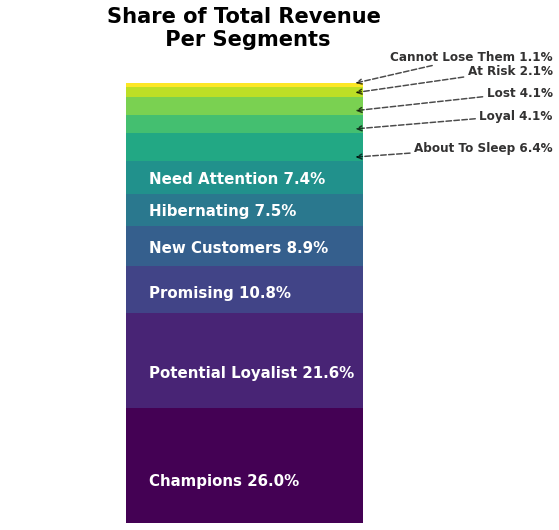

In [346]:
chart = (profiles.groupby('segment')  # per customer segment
         .agg({"Monetary": "sum"})  # retrieve total revenue made from them
         .apply(lambda x: x/x.sum()*100)  # and then get relative values
         .sort_values('Monetary', ascending=False).T)  # sort by share of revenue contribution in descending order

# get vector representing viridis colormap
viridis = matplotlib.cm.get_cmap('viridis', 11)
ax = chart.plot.bar(stacked=True, figsize=(
    8.5, 8.5), legend=False, cmap=viridis)

count = 0
for rec, col in zip(ax.patches, chart.columns):
    count += 1  # for switch (want to label first 6 segments within bar)
    width, height, xy = rec.get_width(), rec.get_height(), rec.get_xy()

    if count > 6:
        ax.annotate(xy=(xy[0]+.48, xy[1]+.9), xytext=(xy[0]+.90, xy[1]+count-2.5),
                    s=f'{col.title()} {height:.1f}%',  arrowprops=dict(arrowstyle='->', lw=1.5, alpha=.7, linestyle='--'),
                    horizontalalignment='right',  verticalalignment='top', color='#333232', fontsize=12, fontweight='semibold')
    else:
        ax.text(xy[0]+.05, xy[1]+height/3,
                f'{col.title()} {height:.1f}%', color='white', fontsize=15, fontweight='bold')
ax.axis('off')
plt.title("Share of Total Revenue\n Per Segments",
          fontsize=21, fontweight='bold', y=1.02)
plt.savefig('fir.png', dpi=1200)

In [339]:
RFMScores.query(
    "segment in  ['Promising', 'Potential Loyalist', 'Champions']").shape[0] / len(RFMScores)

0.1625551804726045

In [340]:
RFMScores.query("segment=='Lost'").shape[0]/len(RFMScores)

0.1931965723188782

Points of interest:
- In the context of revenue contribution, the top 3 segments of whom make up ~16% of customers make up  ~58% of the total revenue. Each of the customers in the aforementioned segments should be of interest to the marketing team given their large revenue contribution relative to the other segments. 
- It's safe to say that segmentation was done correctly for customers in the 'lost' segment (low R,F, and M scores): despite representing ~19% of total customers, their share of contribution total revenue is a low 4%. The company can save resources as well as money by not lowering their priority on marketing efforts made for customers in this segment as it's likely that they were one or two time spenders. 


<a id='7'></a>

# 7. Conlusion

## 7.1 Summary
My mains steps:
1. Got a general idea of the underlying idea through basic exploration steps
2. Dealt with missing values, erroneous or faulty data (ie. negative values), dropped duplicates, and changed data types.
3. Carried out exploratory data analysis. Explored the distribution of variables (ie. `quantity`) over time (date, month) and per unique customer.
4. Preprocessed and conducted an exploratory clustering analysis of the products; used Facebook's fastText unsupervised alogorithm to create vectors from product name and then applied K-means on the result (no statistical tests were done to test K-means clustering performance.
5. Used RFM analysis to segment customers. 
6. Exported relevant data from analysis and created a Tableau dashboard as a deliverable for hypothetical stakeholder.

# 7.2 Suggestions

1. For **champions**, **loyal**: They should be treated with extra care by offering rewards, discounts, bundle offerings (given large order size).
2. For **'Cannot lose'**, **at risk**, and **needs attention** segment: The company should attempt to reach out to them to win them over as loyal customers through engagement.
3. For **potential loyalist,** **new customers** and **promising:** Create relationships with them and an offer personalized discounts. 
4. For **hibernating** and **about to sleep** segments: Launch campaigns or create a win-back strategy to 'reawaken' them. 
4. For **lost** segment: Should have the lowest, if any, marketing and sales attention. They do not bring as much value to the company: have little contribution to total revenue, last active date (8 months on average) and have made very low number of orders (22) over one year. 

### Refer to Dashboard for further recommendations and further detailed insights. 

## 7.3 Limitations and Recommendations for Future Work
- Cancellation orders may have distorted results (but not by much given approach)
- Skewed distributions may have impacted RFM sore
- RFM scores were subjectively chosen. May be improved with further clustering.
- Results based off sales data 
    - For more nuanced and personalized segments and recommendations add demographic data and psychographic variables.
        - Also will help in detecting customers who are more likely to respond favorably to a given marketing or sales outreach.
- Cost per product should be added to help in adding new metrics (ie. return on investment).

---------------------------------------------------------

## 7.4 References 

1. Daqing C., Sai L.S, and Kun G. Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining (2012), Journal of Database Marketing and Customer Strategy Management.Available at: <https://www.matthias-carnein.de/pdf/pakdd19.pdf>.
    - Read through introduction and conclusions to get a rough understanding of (1) customer segmentation and (2) obtain some background context in how to approach the customer segmentation problem. 
2. <a href="https://www.kaggle.com/fabiendaniel/">fabiendaniel's</a> in-depth customer segmentation <a href="https://www.kaggle.com/fabiendaniel/customer-segmentation">Kaggle notebook</a>
    - Great reference for product clustering of which got me to look into forming a systematic approach towards addressing the cancellation orders. Was inspired by the first half of the project.  
3. Wintermeier, N., 2020. Behavioral Segmentation Examples: Advanced Segmentation For Retailers. [online] Blog.crobox.com. Available at: <https://blog.crobox.com/article/behavioral-segmentation-examples>.
    - Overview of applied data analysis approached to the customer segmentation problem. I obtained information on potential features of interest, in particular the RFM model as well as saw the potential of the K-Means clustering algorithm to aide in the exploration phase as well.
4. <a href="https://towardsdatascience.com/@amjadaburmileh?source=post_page-----513ba9e302e7--------------------------------">Amjad Abu-Rmileh's</a> blog: <a href="https://towardsdatascience.com/fasttext-bag-of-tricks-for-efficient-text-classification-513ba9e302e7">How does FastText classifier work under the hood?</a>
    - Introduced me to Facebook's fastText libary of which I used in vectorizing and intial clustering of the the word names in the product description.
5. <a href="https://www.moengage.com/blog/aditya/">Aditya's</a> blog: <a href="https://www.moengage.com/blog/rfm-analysis-using-predictive-segments/">Predictive Segments using RFM Analysis: An In-Depth Guide.</a>
6. <a href="https://linpack-for-tableau.com/data-visualizations/tableau-dashboards/sales-dashboard/rfm-analysis/">LinPack For Tableau</a>: used customer sergment scoring to segment customer as well as drew inspiration from their dashboard.
    - Other Tableau inspirations: <a href="https://linpack-for-tableau.com/data-visualizations/tableau-dashboards/sales-dashboard/rfm-analysis/">Joao Correia's Tableau dashboard.</a>
7. Anish Nair's article <a href="https://www.putler.com/rfm-analysis/">RFM Analysis For Successful Customer Segmentation.</a> Used for obtaining general recommandation for RFM segments as well as actvity description (RFM explanation).  